In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc



In [ ]:
drive.mount('/content/drive')

dataset_path = "/content/drive/MyDrive/Machine Learning Project/"

datasets = ["dataset authentication 1.npz", "dataset authentication 2.npz", "dataset authentication 3.npz"]

models = {
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

def load_dataset(file_path):
    try:
        data = np.load(file_path)
        print("Keys in file:", data.files)

        key_X = "features"
        key_y = "labels"

        if key_X not in data or key_y not in data:
            raise ValueError(f"Dataset {file_path} does not contain '{key_X}' and '{key_y}'.")

        X, y = data[key_X], data[key_y]
        print(f"Loaded {file_path}: X shape = {X.shape}, y shape = {y.shape}")
        return X, y
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None, None


def train_and_evaluate(X, y, dataset_name):
    if X is None or y is None:
        print(f"Skipping {dataset_name} due to loading error.")
        return

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split into 75% train and 25% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    print(f"{dataset_name}: Training size = {X_train.shape[0]}, Test size = {X_test.shape[0]}")

    joblib.dump(scaler, f"{dataset_name}_scaler.pkl")

    for model_name, model in models.items():
        print(f"\nTraining {model_name} on {dataset_name}...")

        try:
            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

            print(f"\n--- {model_name} Classification Report ---")
            print(classification_report(y_test, y_pred))

            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(5, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.title(f"Confusion Matrix - {model_name} ({dataset_name})")
            plt.show()

            if y_proba is not None:
                fpr, tpr, _ = roc_curve(y_test, y_proba)
                roc_auc = auc(fpr, tpr)
                plt.figure(figsize=(6, 5))
                plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
                plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
                plt.xlabel('False Positive Rate')
                plt.ylabel('True Positive Rate')
                plt.title(f'ROC Curve - {model_name} ({dataset_name})')
                plt.legend()
                plt.show()

            joblib.dump(model, f"{dataset_name}_{model_name}.pkl")
        except Exception as e:
            print(f"Error training {model_name} on {dataset_name}: {e}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Keys in file: ['features', 'labels']
Loaded /content/drive/MyDrive/Machine Learning Project/dataset authentication 1.npz: X shape = (14838, 171), y shape = (14838,)
dataset authentication 1: Training size = 11128, Test size = 3710

Training SVM on dataset authentication 1...

--- SVM Classification Report ---
              precision    recall  f1-score   support

   610399182       0.73      0.74      0.74       949
   810101575       0.78      0.83      0.80      1099
   810102187       0.70      0.76      0.73       501
   810103197       0.81      0.71      0.76       454
   810103224       0.81      0.59      0.68       182
   810199569       0.83      0.80      0.81       525

    accuracy                           0.77      3710
   macro avg       0.78      0.74      0.75      3710
weighted avg       0.77      0.77      0.77      3710



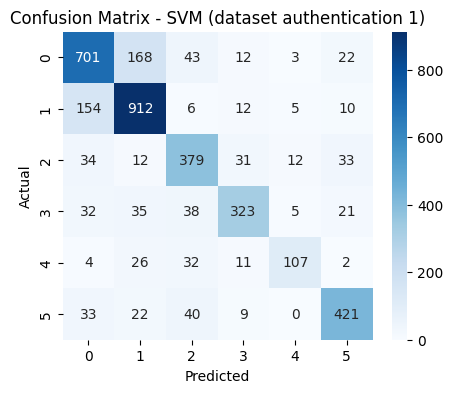

Error training SVM on dataset authentication 1: multiclass format is not supported

Training KNN on dataset authentication 1...

--- KNN Classification Report ---
              precision    recall  f1-score   support

   610399182       0.59      0.69      0.63       949
   810101575       0.66      0.72      0.69      1099
   810102187       0.59      0.60      0.59       501
   810103197       0.69      0.52      0.59       454
   810103224       0.54      0.47      0.50       182
   810199569       0.82      0.62      0.71       525

    accuracy                           0.64      3710
   macro avg       0.65      0.60      0.62      3710
weighted avg       0.65      0.64      0.64      3710



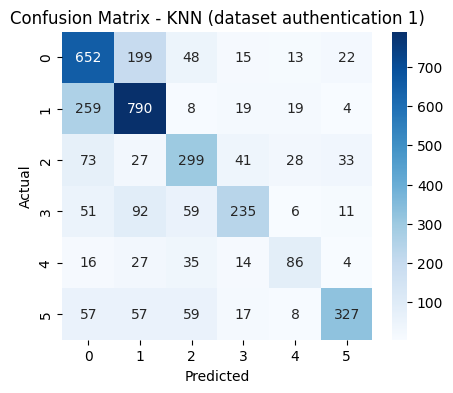

Error training KNN on dataset authentication 1: multiclass format is not supported

Training MLP on dataset authentication 1...

--- MLP Classification Report ---
              precision    recall  f1-score   support

   610399182       0.72      0.72      0.72       949
   810101575       0.76      0.77      0.77      1099
   810102187       0.70      0.68      0.69       501
   810103197       0.76      0.77      0.77       454
   810103224       0.64      0.62      0.63       182
   810199569       0.78      0.79      0.78       525

    accuracy                           0.74      3710
   macro avg       0.73      0.72      0.73      3710
weighted avg       0.74      0.74      0.74      3710



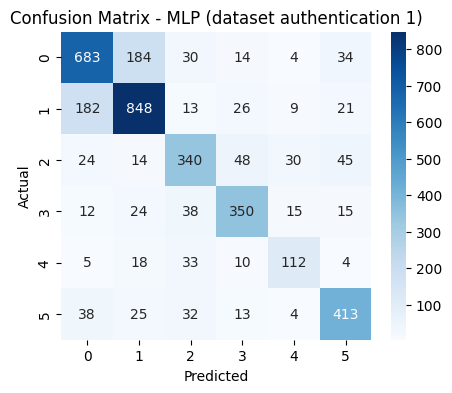

Error training MLP on dataset authentication 1: multiclass format is not supported
Keys in file: ['features', 'labels']
Loaded /content/drive/MyDrive/Machine Learning Project/dataset authentication 2.npz: X shape = (19138, 171), y shape = (19138,)
dataset authentication 2: Training size = 14353, Test size = 4785

Training SVM on dataset authentication 2...

--- SVM Classification Report ---
              precision    recall  f1-score   support

   810100217       0.68      0.51      0.58       738
   810102345       0.85      0.19      0.31       152
   810103054       0.84      0.96      0.89      2409
   810103123       0.92      0.85      0.88       220
   810103262       0.81      0.78      0.80       471
   810199319       0.86      0.84      0.85       795

    accuracy                           0.82      4785
   macro avg       0.83      0.69      0.72      4785
weighted avg       0.82      0.82      0.81      4785



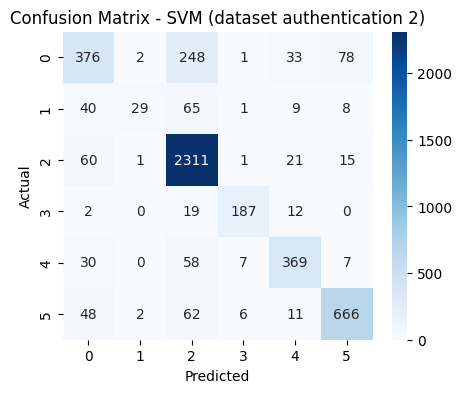

Error training SVM on dataset authentication 2: multiclass format is not supported

Training KNN on dataset authentication 2...

--- KNN Classification Report ---
              precision    recall  f1-score   support

   810100217       0.45      0.41      0.43       738
   810102345       0.43      0.19      0.26       152
   810103054       0.74      0.92      0.82      2409
   810103123       0.90      0.80      0.84       220
   810103262       0.70      0.42      0.53       471
   810199319       0.83      0.60      0.70       795

    accuracy                           0.71      4785
   macro avg       0.68      0.56      0.60      4785
weighted avg       0.71      0.71      0.70      4785



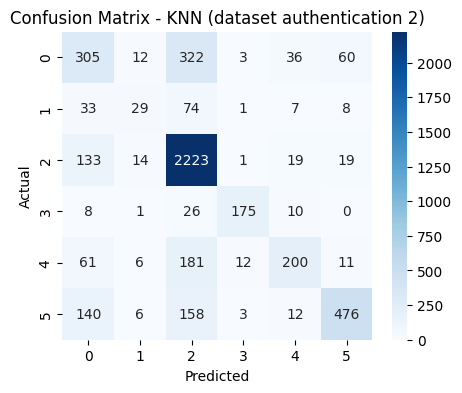

Error training KNN on dataset authentication 2: multiclass format is not supported

Training MLP on dataset authentication 2...

--- MLP Classification Report ---
              precision    recall  f1-score   support

   810100217       0.61      0.61      0.61       738
   810102345       0.44      0.43      0.44       152
   810103054       0.89      0.89      0.89      2409
   810103123       0.86      0.90      0.88       220
   810103262       0.79      0.77      0.78       471
   810199319       0.82      0.82      0.82       795

    accuracy                           0.81      4785
   macro avg       0.74      0.74      0.74      4785
weighted avg       0.81      0.81      0.81      4785



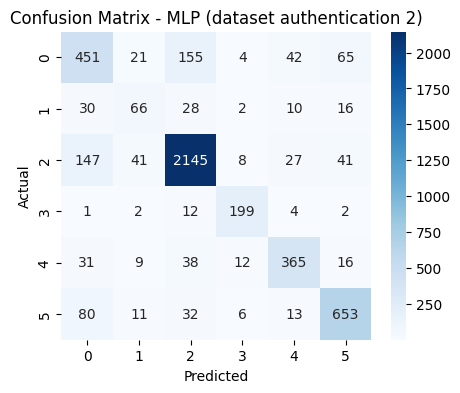

Error training MLP on dataset authentication 2: multiclass format is not supported
Keys in file: ['features', 'labels']
Loaded /content/drive/MyDrive/Machine Learning Project/dataset authentication 3.npz: X shape = (17229, 171), y shape = (17229,)
dataset authentication 3: Training size = 12921, Test size = 4308

Training SVM on dataset authentication 3...

--- SVM Classification Report ---
              precision    recall  f1-score   support

   610399206       0.87      0.94      0.90      1066
   810101471       0.86      0.91      0.89       392
   810103317       0.82      0.94      0.88      1462
   810199423       0.68      0.36      0.47       397
   810600065       0.72      0.58      0.64       486
   810600088       0.81      0.75      0.78       505

    accuracy                           0.82      4308
   macro avg       0.79      0.75      0.76      4308
weighted avg       0.81      0.82      0.81      4308



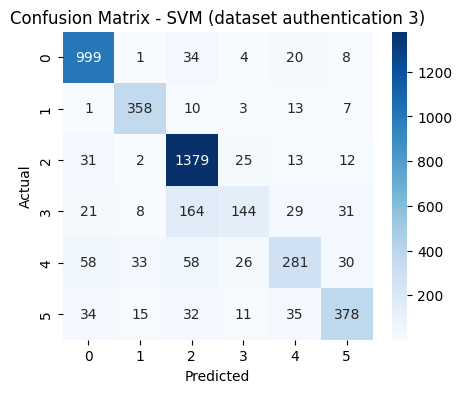

Error training SVM on dataset authentication 3: multiclass format is not supported

Training KNN on dataset authentication 3...

--- KNN Classification Report ---
              precision    recall  f1-score   support

   610399206       0.72      0.91      0.81      1066
   810101471       0.74      0.91      0.81       392
   810103317       0.75      0.93      0.83      1462
   810199423       0.55      0.19      0.28       397
   810600065       0.66      0.34      0.45       486
   810600088       0.80      0.43      0.56       505

    accuracy                           0.73      4308
   macro avg       0.70      0.62      0.62      4308
weighted avg       0.72      0.73      0.70      4308



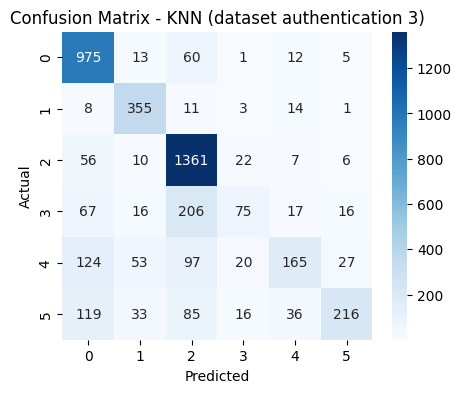

Error training KNN on dataset authentication 3: multiclass format is not supported

Training MLP on dataset authentication 3...

--- MLP Classification Report ---
              precision    recall  f1-score   support

   610399206       0.89      0.91      0.90      1066
   810101471       0.86      0.88      0.87       392
   810103317       0.86      0.88      0.87      1462
   810199423       0.54      0.51      0.52       397
   810600065       0.68      0.64      0.66       486
   810600088       0.79      0.77      0.78       505

    accuracy                           0.81      4308
   macro avg       0.77      0.76      0.77      4308
weighted avg       0.81      0.81      0.81      4308



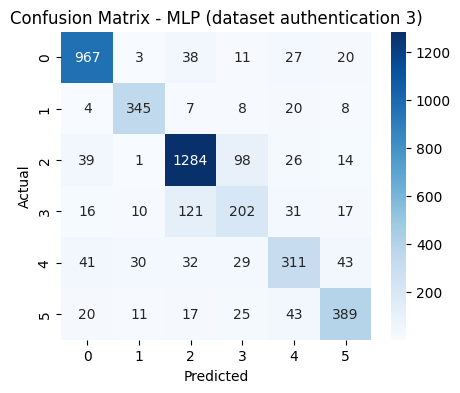

Error training MLP on dataset authentication 3: multiclass format is not supported


In [ ]:
for dataset in datasets:
    file_path = os.path.join(dataset_path, dataset)
    X, y = load_dataset(file_path)
    train_and_evaluate(X, y, dataset.split('.')[0])